# Demo with pre-trained downloaded parameters



In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
!pwd
!ls
!cd drive/MyDrive/


/content/drive/.shortcut-targets-by-id/1-6lBJJmXy-kWeszWhp7TbwO6mfma1jXx/SARAS-Net
cal_acc.py  demo.py  model.py		     README.md	   test_dataset   train.py
cfgs	    image    model_weight_LEVIR.pth  sample	   test_trial
dataset     LEVIR    __pycache__	     SOTA_methods  train_dataset
/bin/bash: line 1: cd: drive/MyDrive/: No such file or directory


In [12]:
%cd /content/drive/MyDrive/SARAS-Net

/content/drive/.shortcut-targets-by-id/1-6lBJJmXy-kWeszWhp7TbwO6mfma1jXx/SARAS-Net


In [13]:
!ls

cal_acc.py  demo.py  model.py		     README.md	   test_dataset   train.py
cfgs	    image    model_weight_LEVIR.pth  sample	   test_trial
dataset     LEVIR    __pycache__	     SOTA_methods  train_dataset


In [14]:
!pip install einops

In [24]:
%cd /content/drive/MyDrive/30/SARAS-Net

/content/drive/.shortcut-targets-by-id/1-6lBJJmXy-kWeszWhp7TbwO6mfma1jXx/SARAS-Net


In [25]:
!python demo.py

1
/content/drive/.shortcut-targets-by-id/1-6lBJJmXy-kWeszWhp7TbwO6mfma1jXx/SARAS-Net/demo.py:73: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs1,inputs2,targets = Variable(inputs1.unsqueeze(0), volatile=True),Variable(input2.unsqueeze(0),volatile=True) ,Variable(targets)
./sample/pred_511.jpg
2
./sample/pred_511.jpg
3
./sample/pred_511.jpg
4
./sample/pred_511.jpg


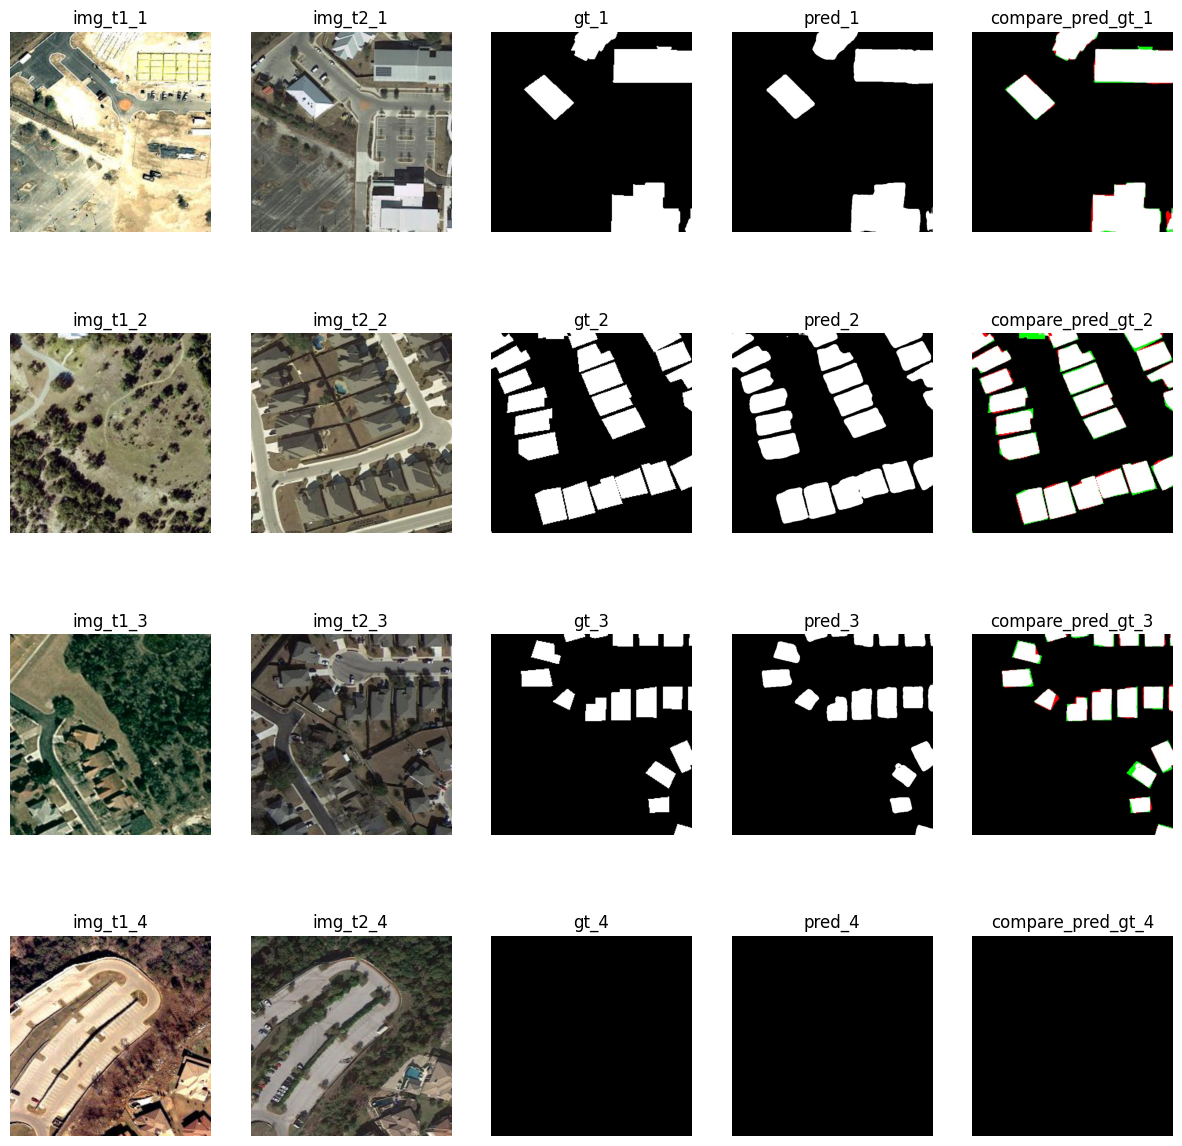

In [28]:
import matplotlib.pyplot as plt
import cv2

fig, ax = plt.subplots(4, 5, figsize=(15, 15))

for i in range(1, 5):
    # Load your images
    img_t1 = cv2.imread(f"/content/drive/MyDrive/30/SARAS-Net/sample/LEVIR_t1_{i}.png")
    img_t2 = cv2.imread(f"/content/drive/MyDrive/30/SARAS-Net/sample/LEVIR_t2_{i}.png")
    gt = cv2.imread(f"/content/drive/MyDrive/30/SARAS-Net/sample/gt_{i}.jpg")
    pred = cv2.imread(f"/content/drive/MyDrive/30/SARAS-Net/sample/pred_{i}.jpg")
    diff = cv2.imread(f"/content/drive/MyDrive/30/SARAS-Net/sample/compare_pred_gt_{i}.jpg")

    img_t1 = cv2.resize(img_t1, (512, 512))
    img_t2 = cv2.resize(img_t2, (512, 512))
    gt = cv2.resize(gt, (512, 512))
    pred = cv2.resize(pred, (512, 512))
    diff = cv2.resize(diff, (512, 512))

    # Display each image
    ax[i - 1][0].imshow(cv2.cvtColor(img_t1, cv2.COLOR_BGR2RGB))
    ax[i - 1][0].set_title(f'img_t1_{i}')

    ax[i - 1][1].imshow(cv2.cvtColor(img_t2, cv2.COLOR_BGR2RGB))
    ax[i - 1][1].set_title(f'img_t2_{i}')

    ax[i - 1][2].imshow(cv2.cvtColor(gt, cv2.COLOR_BGR2RGB))
    ax[i - 1][2].set_title(f'gt_{i}')

    ax[i - 1][3].imshow(cv2.cvtColor(pred, cv2.COLOR_BGR2RGB))
    ax[i - 1][3].set_title(f'pred_{i}')

    ax[i - 1][4].imshow(cv2.cvtColor(diff, cv2.COLOR_BGR2RGB))
    ax[i - 1][4].set_title(f'compare_pred_gt_{i}')

# Hide axis labels and ticks
for a in ax.flatten():
    a.axis('off')


# Show all the images in a single figure
plt.show()


# Training

The total number of epochs used for training the model are 40000. Here for visualisation purposes, only 4 epochs are used.

In [ ]:
!unzip /content/drive/MyDrive/train.zip -d /content/drive/MyDrive/30/SARAS-Net/train_dataset

In [ ]:
!unzip /content/drive/MyDrive/val.zip -d /content/drive/MyDrive/30/SARAS-Net/train_dataset/val

In [ ]:
import os
train_A  =  "/content/drive/MyDrive/30/SARAS-Net/train_dataset/train/A"
train_B =  "/content/drive/MyDrive/30/SARAS-Net/train_dataset/train/B"
labels = "/content/drive/MyDrive/30/SARAS-Net/train_dataset/train/label"

file_names = os.listdir(train_A)
train_A_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

file_names = os.listdir(train_B)
train_B_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

file_names = os.listdir(labels)
label_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

In [ ]:
ln = len(label_files)

with open(f"/content/drive/MyDrive/30/SARAS-Net/train_dataset/train.txt", "w") as file:

  txt = ""
  for _ in range(ln):
    txt += 'train/A/'
    txt += train_A_files[_]
    txt += ' '

    txt+= 'train/B/'
    txt += train_B_files[_]
    txt += ' '

    txt += 'train/label/'
    txt += label_files[_]
    txt += '\n'
  file.write(f"{txt}")

In [ ]:
import os
train_A  =  "/content/drive/MyDrive/30/SARAS-Net/train_dataset/val/A"
train_B =  "/content/drive/MyDrive/30/SARAS-Net/train_dataset/val/B"
labels = "/content/drive/MyDrive/30/SARAS-Net/train_dataset/val/label"

file_names = os.listdir(train_A)
train_A_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

file_names = os.listdir(train_B)
train_B_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

file_names = os.listdir(labels)
label_files = sorted(file_names, key=lambda x: (x.split('_')[1].split('.')[0]))

In [ ]:
ln = len(label_files)

with open(f"/content/drive/MyDrive/30/SARAS-Net/train_dataset/val.txt", "w") as file:

  txt = ""
  for _ in range(ln):
    txt += 'val/A/'
    txt += train_A_files[_]
    txt += ' '

    txt+= 'val/B/'
    txt += train_B_files[_]
    txt += ' '

    txt += 'val/label/'
    txt += label_files[_]
    txt += '\n'
  file.write(f"{txt}")


In [ ]:
!python train.py

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
train_loader 445
val_loader 64
epoch 0 learning rate:  0.05
0it [00:00, ?it/s] Epoch [0/0] Loss: 0.7776 
100it [01:56,  1.00it/s] Epoch [0/100] Loss: 0.2523 
200it [03:36,  1.00s/it] Epoch [0/200] Loss: 0.0852 
300it [05:18,  1.03s/it] Epoch [0/300] Loss: 0.1636 
400it [06:59,  1.03s/it] Epoch [0/400] Loss: 0.1708 
445it [07:45,  1.05s/it]
64it [00:28,  2.27it/s]
loss_total tensor(6.6364, device='cuda:0')
loss_pre 100000
epoch 1 learning rate:  0.05
0it [00:00, ?it/s] Epoch [1/0] Loss: 0.1874 
100it [01:43,  1.03s/it] E

#Testing and accuracy

In [ ]:
!unzip /content/drive/MyDrive/test.zip -d /content/drive/MyDrive/30/SARAS-Net/test_dataset

In [29]:
!python cal_acc.py

  0% 0/128 [00:00<?, ?it/s]/content/drive/.shortcut-targets-by-id/1-6lBJJmXy-kWeszWhp7TbwO6mfma1jXx/SARAS-Net/cal_acc.py:86: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs1,inputs2,targets = Variable(inputs1.unsqueeze(0), volatile=True),Variable(inputs2.unsqueeze(0),volatile=True) ,Variable(targets)
Figure(640x480)
  1% 1/128 [00:10<22:33, 10.66s/it]Figure(640x480)
  2% 2/128 [00:19<20:02,  9.54s/it]Figure(640x480)
  2% 3/128 [00:25<16:47,  8.06s/it]Figure(640x480)
  3% 4/128 [00:31<15:04,  7.30s/it]Figure(640x480)
  4% 5/128 [00:39<15:02,  7.34s/it]Figure(640x480)
  5% 6/128 [00:45<14:11,  6.98s/it]Figure(640x480)
  5% 7/128 [00:52<13:44,  6.82s/it]Figure(640x480)
  6% 8/128 [00:58<13:22,  6.69s/it]Figure(640x480)
  7% 9/128 [01:04<13:00,  6.56s/it]Figure(640x480)
  8% 10/128 [01:11<12:47,  6.50s/it]Figure(640x480)
  9% 11/128 [01:17<12:42,  6.51s/it]Figure(640x480)
  9% 12/128 [01:24<12:47,  6.61s/it]Figure(640x480)
 10% 13/128 

In [ ]:
!pwd

In [ ]:
!unzip  /content/drive/MyDrive/test_trial.zip  -d /content/drive/MyDrive/30/SARAS-Net/test_trial

Checking accuracy for another dataset

In [ ]:
!python cal_acc.py


  0% 0/51 [00:00<?, ?it/s]/content/drive/MyDrive/30/SARAS-Net/cal_acc.py:86: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs1,inputs2,targets = Variable(inputs1.unsqueeze(0), volatile=True),Variable(inputs2.unsqueeze(0),volatile=True) ,Variable(targets)
Figure(640x480)
  2% 1/51 [00:02<01:45,  2.11s/it]Figure(640x480)
  4% 2/51 [00:02<00:56,  1.16s/it]Figure(640x480)
  6% 3/51 [00:03<00:39,  1.21it/s]Figure(640x480)
  8% 4/51 [00:03<00:32,  1.46it/s]Figure(640x480)
 10% 5/51 [00:03<00:28,  1.64it/s]Figure(640x480)
 12% 6/51 [00:04<00:25,  1.73it/s]Figure(640x480)
 14% 7/51 [00:04<00:23,  1.89it/s]Figure(640x480)
 16% 8/51 [00:05<00:22,  1.90it/s]Figure(640x480)
 18% 9/51 [00:05<00:20,  2.04it/s]Figure(640x480)
 20% 10/51 [00:06<00:19,  2.14it/s]Figure(640x480)
 22% 11/51 [00:06<00:18,  2.15it/s]Figure(640x480)
 24% 12/51 [00:07<00:18,  2.14it/s]Figure(640x480)
 25% 13/51 [00:07<00:17,  2.12it/s]Figure(640x480)
 27% 14/51 [00:08<00: